# Case Background & Key Questions	

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of his years’ survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1)  How does health status, represented by average number of days with bad physical health in the past month (PHYSHLTH), differ by state? Also provide an indication of distribution using whatever statistics you find suitable.
 												 								
2)  Digging deeper into the data, what are some factors that impact health (i.e. demographics, behaviors, previous illness, etc.)?	
						 						
To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_studey.csv`. Below you will find a list of steps/questions that you will need to take in your investigation. The first part of the notebook will be focused on cleaning up your data and vidualizing it.  The second part of the data set will be focused on performing statistical tests to make statements with statistical significance.  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# pd.read_csv('case_study.csv')

In [2]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head()

In [ ]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [3]:
# condition = df[(df['_STATE'] == 9.0) or (df['_STATE'] == 34.0) or (df['_STATE'] == 36.0)]

df = df[df['_STATE'].isin([9,34,36])]
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303774,36.0,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303775,36.0,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303776,36.0,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303777,36.0,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,NaN,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


Now check to see how large our subset df.

In [ ]:
# your code here

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code.

In [4]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [5]:
zero_dict = {88 : 0,
            77 : np.nan,
            99 :np. nan}

df['PHYSHLTH'] = df['PHYSHLTH'].replace(zero_dict) #inplace=True

df.dropna(subset=['PHYSHLTH'], inplace=True)
# dropping rows where three is null value in PHYSHLTH column

In [7]:
df.shape

(33747, 358)

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a graph shows the distribution of the data.

In [8]:
# descriptive statistics
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

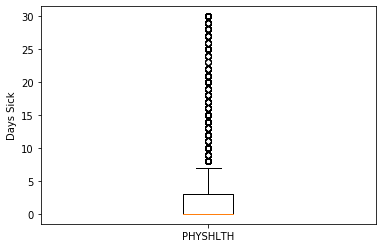

In [36]:
fig, ax = plt.subplots(figsize=(6,4))

ax.boxplot(df['PHYSHLTH'])
ax.set_xticklabels(['PHYSHLTH'])
ax.set_ylabel('Days Sick')

plt.show()


# df.boxplot(column=['PHYSHLTH'])

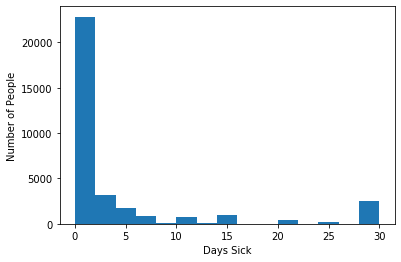

In [38]:
fig, ax = plt.subplots(figsize=(6,4))

ax.hist(df['PHYSHLTH'], bins=15)
ax.set_xlabel('Days Sick')
ax.set_ylabel('Number of People')

plt.show()

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [41]:
df.groupby('_STATE')['PHYSHLTH'].mean()#.values

_STATE
9.0     3.688562
34.0    4.380957
36.0    4.148030
Name: PHYSHLTH, dtype: float64

i didnt need to separate the states. i could've set previous cell to a variable and called it in the visualization. pandas would've separated the states for me (since i grouped by them, separately).

In [44]:
# code to calculate the average number of sick days by state
ct = df[df['_STATE'] == 9.0]
nj = df[df['_STATE'] == 34.0]
ny = df[df['_STATE'] == 36.0]

In [42]:
ct_sick = ct['PHYSHLTH'].mean()
nj_sick = nj['PHYSHLTH'].mean()
ny_sick = ny['PHYSHLTH'].mean()

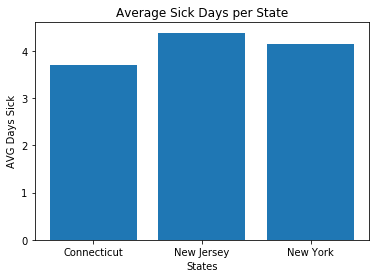

In [43]:
# code to graph those averages using matplotlib
fig, ax = plt.subplots(figsize=(6,4))

ax.bar(['Connecticut', 'New Jersey', 'New York'], [ct_sick, nj_sick, ny_sick])
ax.set_xlabel('States')
ax.set_ylabel('AVG Days Sick')
ax.set_title('Average Sick Days per State')

plt.show()

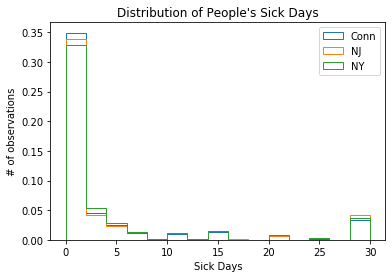

In [45]:
fig, ax = plt.subplots(figsize=(6,4))

ax.hist(ct['PHYSHLTH'], label='Conn', bins=15, histtype='step', density=True)

ax.hist(nj['PHYSHLTH'], label='NJ', bins=15, histtype='step',density=True)

ax.hist(ny['PHYSHLTH'], label = 'NY', bins=15, histtype='step', density=True)

ax.legend()
ax.set_xlabel('Sick Days')
ax.set_ylabel('# of observations')
ax.set_title("Distribution of People's Sick Days")

plt.show()

## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [52]:
# code to create new colum for chronically sick
# use np.where and give ppl who r chronic a 1 and others a 0
df['CHRONIC_SICK'] = np.where(df['PHYSHLTH'].values > 14, 1, 0)
# df.head(30)

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [53]:
df.groupby('_STATE')['CHRONIC_SICK'].mean()

_STATE
9.0     0.103428
34.0    0.127335
36.0    0.115948
Name: CHRONIC_SICK, dtype: float64

Text(0, 0.5, 'Average of People')

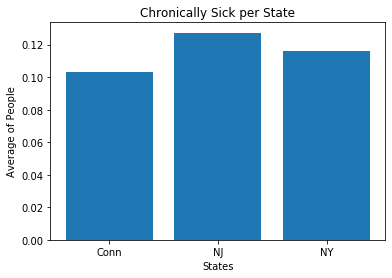

In [60]:
state_sick= df.groupby('_STATE')['CHRONIC_SICK'].mean()
# state_sick.plot.bar()

fig, ax = plt.subplots(figsize=(6,4))

ax.bar(['Conn', 'NJ', 'NY'], state_sick)
ax.set_title('Chronically Sick per State')
ax.set_xlabel('States')
ax.set_ylabel('Average of People')

# ask the workings behind the code graphing code. 

## 6. Independent Variables (categorical)

Does smoking affect the number of days people feel physically ill? 
Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`. When cleaning this data you will find that many respondents were not asked that question. read the codebook to understand why, and use that information when cleaning up your data. I.E, you will need to process two columns in order to create a new column of smokers.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [69]:
conditions = [((df['SMOKE100'] == 1.0) & (df['SMOKDAY2'] == 1.0)),
              ((df['SMOKE100'] == 1.0) & (df['SMOKDAY2'] == 2.0)),
              df['SMOKE100'] == 2.0]

choices = ['Every Day', 'Some Days', 'Non-Smoker']

df['SMOKER'] = np.select(conditions, choices, default='Unknown')

In [ ]:
# for row in df.smokday.iterrows()

In [ ]:
# df['LIARS'] = np.where(df['SMOKE100'].values == 1, 1, df['SMOKDAY2'].values)
# df['LIARS'].head(10)

# df.LIARS.replace({1: 'one',2: 'two'}, inplace=True)

In [ ]:
# your code here
df['smoking'] = np.where(df['SMOKE100']==2, 3, df['SMOKDAY2'])
df['smoking']

In [72]:
smok_avg = df['SMOKER'].value_counts()/df['SMOKER'].count()

Non-Smoker    0.553679
Unknown       0.329363
Every Day     0.077370
Some Days     0.039589
Name: SMOKER, dtype: float64

In [ ]:
# smokers = df.groupby('SMOKER').count()

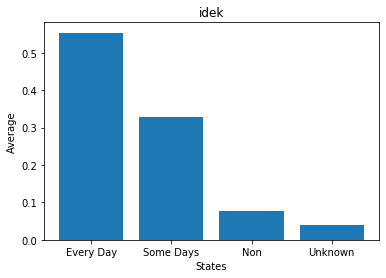

In [74]:
# code to graph those proportion of differen smoking groups using matplotlib

fig, ax = plt.subplots()

ax.bar(['Every Day', 'Some Days', 'Non', 'Unknown'], smok_avg)
ax.set_xlabel('States')
ax.set_ylabel('Average')
ax.set_title('idek')

plt.show()

In [91]:
# your code here
df.groupby(['_STATE', 'SMOKER'])['SMOKER'].count()

_STATE  SMOKER    
9.0     Every Day      706
        Non-Smoker    5704
        Some Days      344
        Unknown       3659
34.0    Every Day      901
        Non-Smoker    6346
        Some Days      480
        Unknown       3731
36.0    Every Day     1004
        Non-Smoker    6635
        Some Days      512
        Unknown       3725
Name: SMOKER, dtype: int64

In [93]:
state_smoke = df.groupby(['_STATE', 'SMOKER'])['SMOKER'].agg({'SMOKER': 'count'})
state_smoke

/Users/samraykhman/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


SMOKER
_STATE SMOKER            
9.0    Every Day      706
       Non-Smoker    5704
       Some Days      344
       Unknown       3659
34.0   Every Day      901
       Non-Smoker    6346
       Some Days      480
       Unknown       3731
36.0   Every Day     1004
       Non-Smoker    6635
       Some Days      512
       Unknown       3725

In [81]:
state_pct = state_smoke.groupby(level=0).apply(lambda x: 
                                               100 * x / float(x.sum()))

In [82]:
state_pct

SMOKER
_STATE SMOKER               
9.0    Every Day    6.779987
       Non-Smoker  54.777682
       Some Days    3.303563
       Unknown     35.138769
34.0   Every Day    7.863501
       Non-Smoker  55.384884
       Some Days    4.189213
       Unknown     32.562402
36.0   Every Day    8.454025
       Non-Smoker  55.868979
       Some Days    4.311216
       Unknown     31.365780

In [83]:
#graph showing the breakdown of smokers per state
state_pct.unstack()

SMOKER                                
SMOKER Every Day Non-Smoker Some Days    Unknown
_STATE                                          
9.0     6.779987  54.777682  3.303563  35.138769
34.0    7.863501  55.384884  4.189213  32.562402
36.0    8.454025  55.868979  4.311216  31.365780

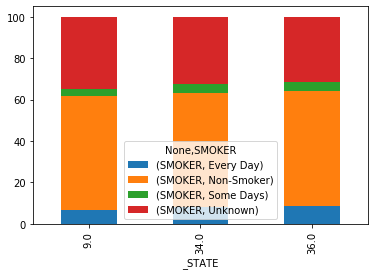

In [84]:
state_pct.unstack().plot(kind='bar', stacked=True)

In [ ]:
# code to graph these averages sick days for each category of smoking status

## 7. Independent Variables (continuous):

Does the amount of days a person drinks affect the number of days they feel physically ill?
To investigate this, let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [85]:
# df_alc = df[['_STATE', 'PHYSHLTH', 'ALCDAY5']]
# df_alc

In [20]:
df['ALCDAY5'].describe()

count    31922.000000
mean       468.457177
std        350.129601
min        101.000000
25%        201.000000
50%        212.000000
75%        888.000000
max        999.000000
Name: ALCDAY5, dtype: float64

In [21]:
df[(df['ALCDAY5'] > 107) & (df['ALCDAY5'] < 201)]

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,CHRONIC_SICK


In [88]:
# code here to clean up the ALCDAY5 responses
alc_dict = {
            777: np.nan,
            999: np.nan
        }


df['ALCOHOLIC'] = df['ALCDAY5'].replace(alc_dict, inplace=True)

conditiona = [
              (df['ALCDAY5'] <= 107) & (df['ALCDAY5'] > 100), 
              ((df['ALCDAY5'] >= 201) & (df['ALCDAY5'] <= 230)),
              df['ALCDAY5'] == 888]

choicea = [((df['ALCDAY5'] - 100) * (30/7)),
          df['ALCDAY5'] - 200,
          0]

df['ALCOHOLIC'] = np.select(conditiona, choicea, default=np.nan)
# df['ALCOHOLIC'].isna().sum()

df['ALCOHOLIC'].describe()

count    31532.000000
mean         5.475947
std          8.404583
min          0.000000
25%          0.000000
50%          2.000000
75%          7.000000
max         30.000000
Name: ALCOHOLIC, dtype: float64

In [ ]:
# df[df['ALCDAY5'] < 101]

In [ ]:
#descriptive statistics of cleaned data

count    31532.000000
mean         5.504455
std          8.450005
min          0.000000
25%          0.000000
50%          2.000000
75%          7.000000
max         30.416680
Name: alcohol, dtype: float64


In [95]:
df['ALCOHOLIC']

49938      4.285714
49939     30.000000
49940      0.000000
49941     12.857143
49942      4.285714
            ...    
303774     3.000000
303775     0.000000
303776     4.000000
303777          NaN
303778    30.000000
Name: ALCOHOLIC, Length: 33747, dtype: float64

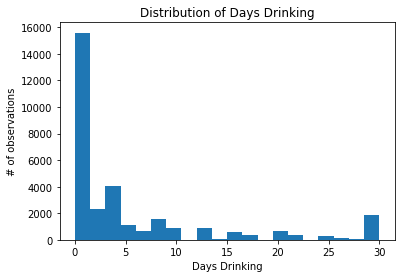

In [99]:
# graphic showing the histogram of data
# alcoholics = df.groupby('ALCOHOLIC')
# alcoholics.dropna()

fig, ax = plt.subplots(figsize=(6,4))

ax.hist(df['ALCOHOLIC'], bins=20)

ax.set_xlabel('Days Drinking')
ax.set_ylabel('# of observations')
ax.set_title('Distribution of Days Drinking')

plt.show()

In [101]:
# code to calculate averages per state
state_alc = df.groupby('_STATE')['ALCOHOLIC'].mean()
state_alc

_STATE
9.0     6.178850
34.0    5.041433
36.0    5.280356
Name: ALCOHOLIC, dtype: float64

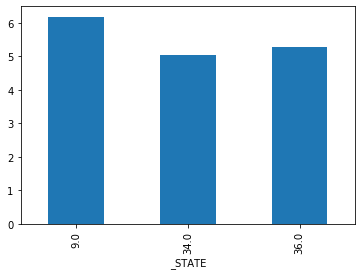

In [102]:
state_alc.plot.bar()

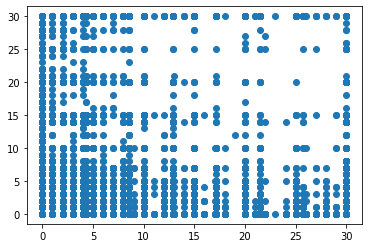

In [111]:
# Code to calculate correlation of between number of dirnks of number of days physically ill
# look at descriptive stats lab

df.corr()['ALCOHOLIC']['PHYSHLTH']
plt.scatter(df['ALCOHOLIC'], df['PHYSHLTH'])
# scatter plot between alcoholic and phsyhlth

## 8. Statistical Inference


- Create a 95% confidence interval for the population mean of physically ill days.

-  Create a 95% confidence interval for the true proportion of chronically sick people.

## 9. Hypothesis Tests 

**For the follwing questions that require hypothesis tests, you must complete the following:**

*1. Write down the null and alternative hypothesis you are testing.* 

*2. Select the appropriate test and calculate the test statistic and P-values.*

*3. Determine the critical value for the 95% confidence interval.*

*4. Evaluate the test statistic agains the critical value.*

*5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.*  

### The following questions are regarding the `PHYSHLTH` variable. 
- What is the probability of getting this sample mean for days physically ill, if the population mean is 4?
- Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?
- Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states. 


### The following questions are regarding the  `CHRONIC` variable.
- What is the probability of drawing this sample proportion if chronically true population proportion is 0.10?
- Is there a statistically significant difference in the percentage of men and women who are chronically sick?
- Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states.

# 10. Independent Investigation

Now that you have invesitgated physical health and chronic sickness and their relationships with states and gender, you will conduct a similar investigation with variables of your choosing. 

Select a continuous dependent varaible and a binary dependent variable that you would like to investigate. Then select a categorical independent variable with at least 3 groups and for which you will test to see if the response to the independent variable affects outcomes of the dependent variable.

For your continuous dependent variable perform the following:
  - Determine the sample mean and sample standard deviation
  - Create a confidence interval for a population mean.
  - Perform a two-sample test of means for gender.
  - Perform a one-way ANOVA using your categorical independent variable.

Select/create a binary variable from the survey questions as you dependent variable and perform the following:
  - Create a confidence interval for a population proportion.
  - Perform a two proportions z-test using gender.
  - Perform a Chi-Square test using your categorical independent variable.